In [1]:
import numpy as np
import matplotlib.pyplot as plt

from super_library import NeuralZoo
from super_input import SuperInput
from params import default_neuron_params
from soen_sim import network

In [2]:
times = np.arange(0,150,25)
indices = np.zeros(len(times)).astype(int)
def_spikes = [indices,times]
input = SuperInput(channels=1, type='defined', defined_spikes=def_spikes, duration=150)
default_ib = default_neuron_params['ib_n']

Generating pre-defined input...


# **Neuron Library**
A number of canoncial and potential useful neurons are here demonstrated for SOENs.
 - This demonstration doubles as tutorial for using the `NeuralZoo.custom()` function
 - Single call functions are also available for each neuron
 - For every neuron, both sub-spiking-threshold and spiking behavior are shown
 - Regardless of incoming photon events (red spikes), an SPD may only react once every 35ns
 - A tron (soma) can spike no faster than once every 10ns

# Monosynaptic Point Neuron

![ title](img/neurons/mono_point.png)

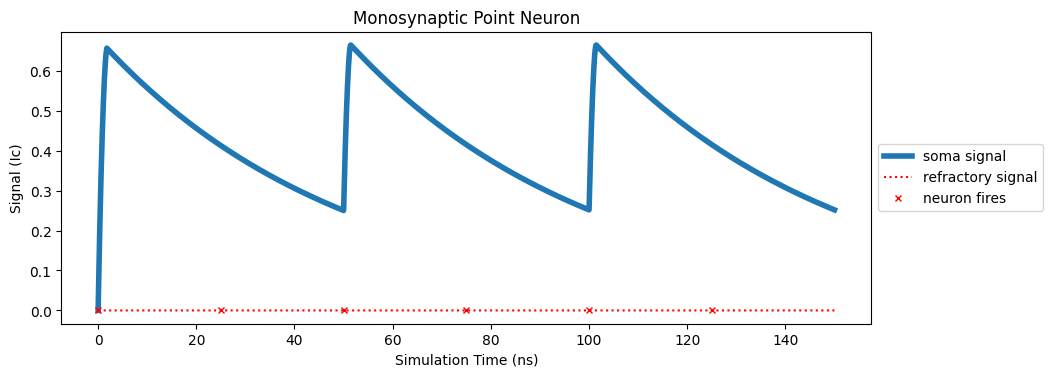

In [9]:
# Using custom()

# synaptic structure [synapse][layer][branch][dendrite]
# one synapse, weight=1, to the 0th layer, branch, and dendrite -> implies soma
syn_struct = [[[[1]]]] 

# call a custom neuron with this property
# kwargs and **kwarg dictionaries also welcome for any neuron parameters
# here, spiking threshold s_th is set to 1
mono_point = NeuralZoo(type="custom",synaptic_structure=syn_struct,s_th=1) 

# add input signal to somatic dendrite
mono_point.synapses[0][0][0][0].add_input(input.signals[0])

# sim = True will run and record network of nodes for tf duration with dt time steps
net = network(sim=True,dt=.01,tf=150,nodes=[mono_point])

# many plotting options with this funcion
mono_point.plot_neuron_activity(net,title="Monosynaptic Point Neuron",input=input)

In [10]:
# Plotting options
print(NeuralZoo.plot_neuron_activity.__doc__)


        Plots signal activity for a given network or neuron
         - phir      -> plot phi_r of soma and phi_r thresholds
         - dend      -> plot dendritic signals
         - input     -> mark moments of input events with red spikes
         - weighting -> weight dendritic signals by their connection strength
        


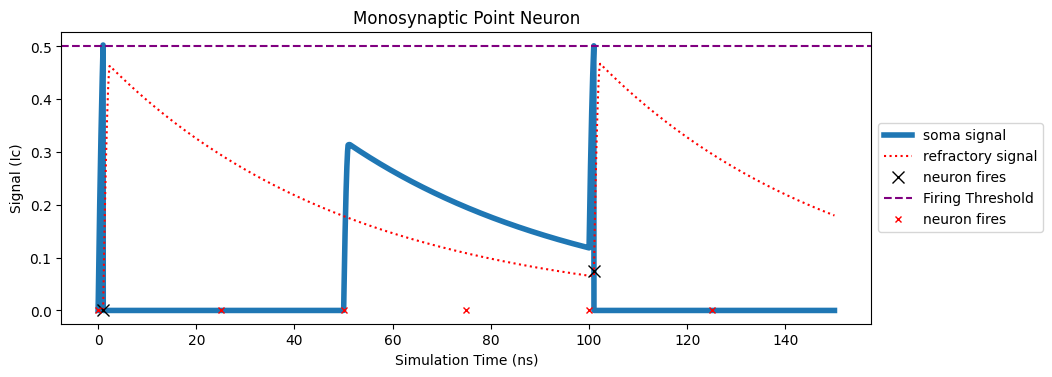

In [11]:
# Using library function
mono_point = NeuralZoo(type='mono_point',s_th=.5)
mono_point.uniform_input(input) # automatically asigns input to all available synapses
net = network(sim=True,dt=.01,tf=150,nodes=[mono_point])
mono_point.plot_neuron_activity(net,title="Monosynaptic Point Neuron",input=input)

# Monosynaptic Neuron with Dendrite

![ title](img/neurons/mono_dend.png)

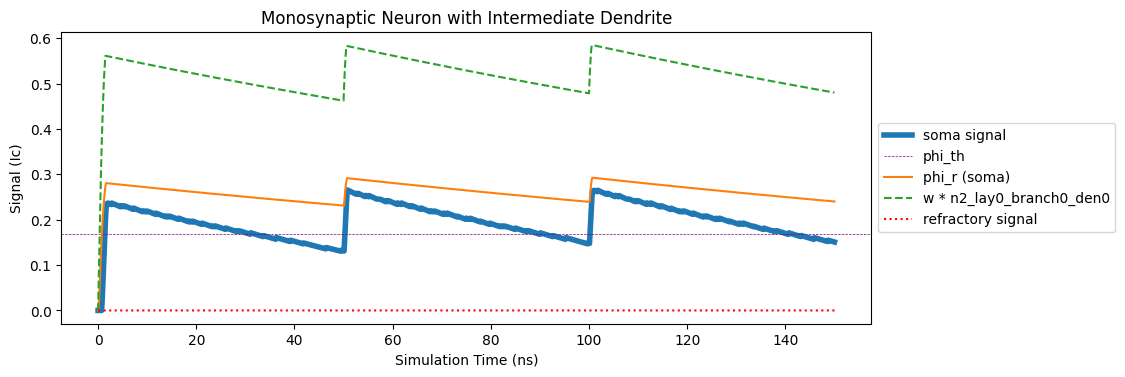

In [12]:
# Monosynaptic neuron with dendrite
# check wobbles


# place a dendrite at the first layer, branch, and position
# connection strength here = 0.5
# IMPORTANT --> somatic denrite is added by default at the start of the weights list
# If mono_dend.denrites is later printed, two dendrites will appear in the same formatting as syn_struct
# mono_dend.dendrites = [[[[soma_object]],[[denrite_object]]]] 
weights = [[[0.5]]]

# no synapse on soma, synapse on first (only) dend
syn_struct = [[[[0]],[[1]]]] 

mono_dend = NeuralZoo(type="custom",weights=weights,synaptic_structure=syn_struct,s_th=1) 

# adding signal only to dendrite at the 1rst layer (soma at 0th layer)
mono_dend.synapses[0][1][0][0].add_input(input.signals[0])

net = network(sim=True,dt=.1,tf=150,nodes=[mono_dend])
title = "Monosynaptic Neuron with Intermediate Dendrite"

# weighting is turned off here, because for only 1 dendrite, phi_r = dend.signal*weighting
mono_dend.plot_neuron_activity(net,phir=True,title=title,weighting=False)


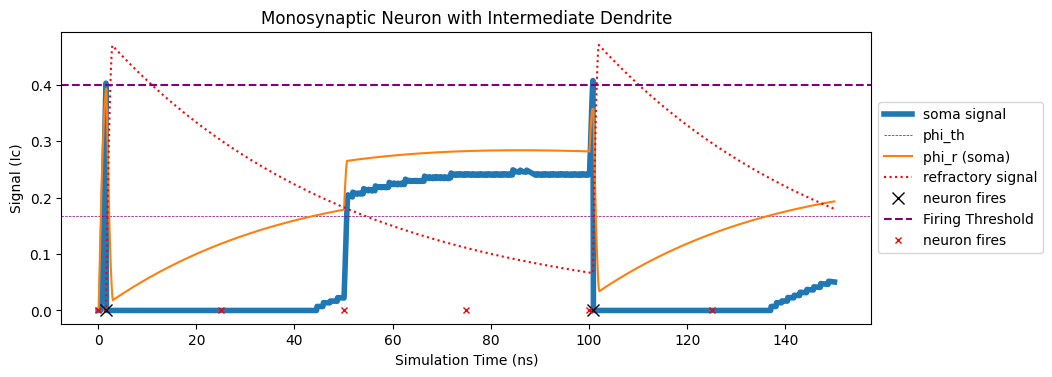

In [13]:
# lower the threshold and increase weight to observe spiking
mono_dend = NeuralZoo(type='mono_dendrite',w_dn=.7,s_th=.4)
mono_dend.uniform_input(input)
net = network(sim=True,dt=.1,tf=150,nodes=[mono_dend])
title = "Monosynaptic Neuron with Intermediate Dendrite"
mono_dend.plot_neuron_activity(net,phir=True,title=title,input=input,weighting=False,dend=False)

# Monosynaptic Neuron with Denrite and Skip Connection

![ title](img/neurons/mono_skip.png)

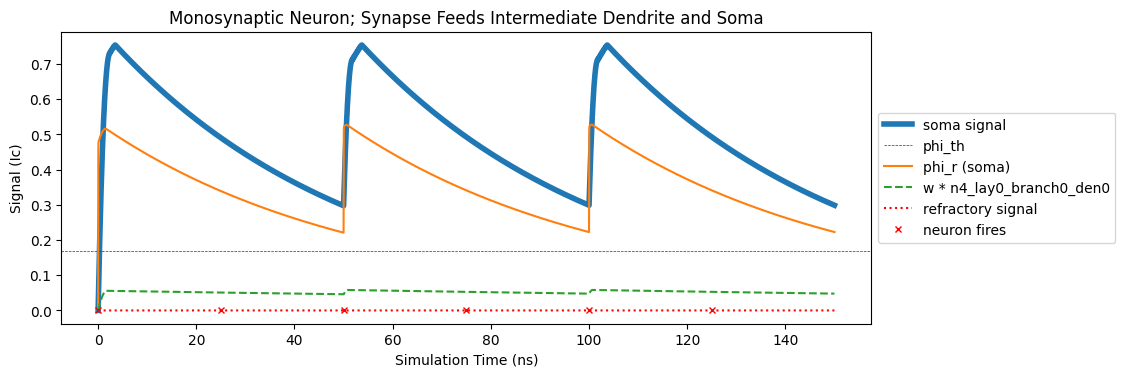

In [14]:
w = [[[.1]]]

# have the first and only synapse feed *both* the soma and the dendrite
# note this is still only one synapse because both indexes are still in the first list
#  [synapse][layer][branch][synapse] -> [0][0][0][0], [0][1][0][0] -> synapse(soma, dendrite)
syn_struct = [[[[1]],[[1]]]]

mono_dend_soma = NeuralZoo(type="custom",weights=w,synaptic_structure=syn_struct,s_th=1) 
mono_dend_soma.synapses[0][1][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[mono_dend_soma])
title = "Monosynaptic Neuron; Synapse Feeds Intermediate Dendrite and Soma"
mono_dend_soma.plot_neuron_activity(net,title=title,input=input,phir=True)

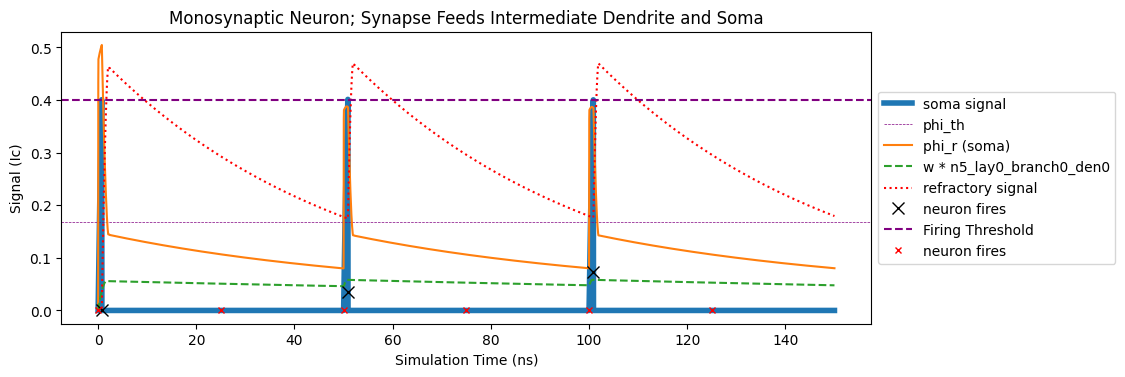

In [15]:
mono_dend_soma = NeuralZoo(type='mono_dend_soma',s_th=0.4)
mono_dend_soma.uniform_input(input)
net = network(sim=True,dt=.01,tf=150,nodes=[mono_dend_soma])
title = "Monosynaptic Neuron; Synapse Feeds Intermediate Dendrite and Soma"
mono_dend_soma.plot_neuron_activity(net,title=title,input=input,phir=True)

# Monosynaptic Neuron with Self-Feeding Dendrite

![ title](img/neurons/mono_self.png)

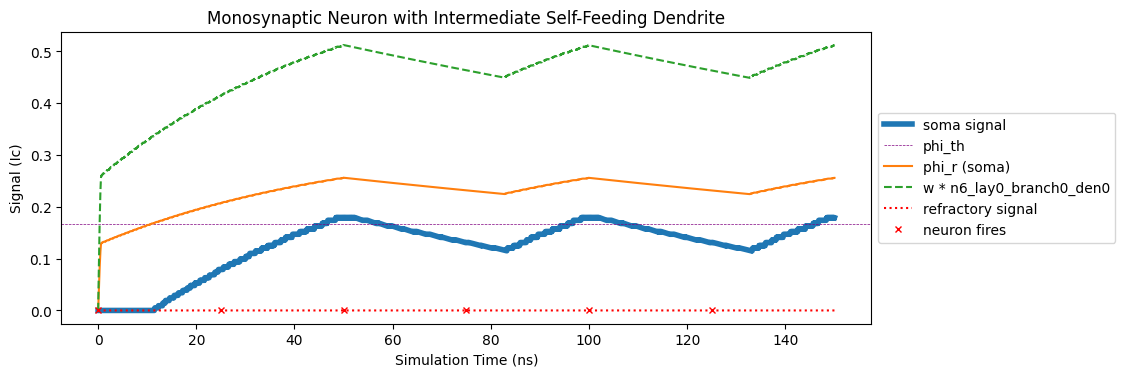

In [16]:
syn_struct = [[[[0]],[[1]]]]
weights = [[[.5]]]

self_feed = NeuralZoo(type='custom',weights=weights,synaptic_structure=syn_struct)

# activate self-feedback with a specified strength for a given neuron
self_feed.dendrites[1][0][0].self_feedback_coupling_strength = .75

self_feed.synapses[0][1][0][0].add_input(input.signals[0])
net = network(sim=True,dt=.01,tf=150,nodes=[self_feed])
title = "Monosynaptic Neuron with Intermediate Self-Feeding Dendrite"
self_feed.plot_neuron_activity(net,title=title,phir=True,input=input,weighting=False)

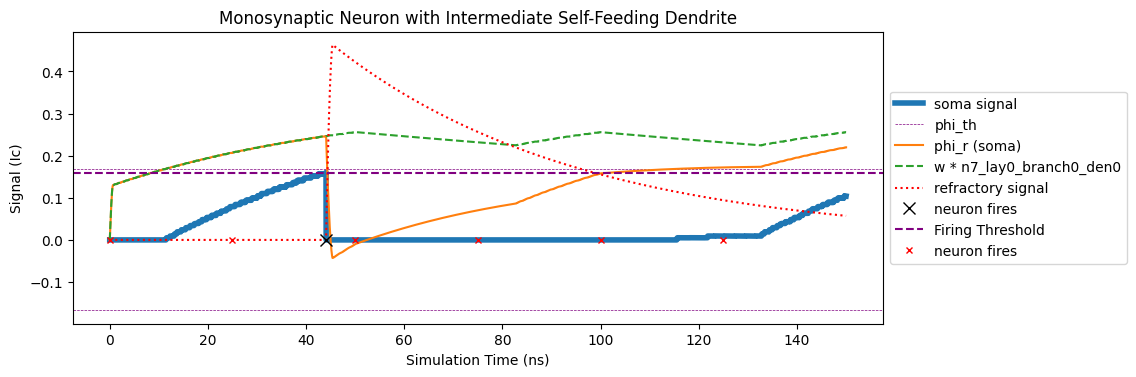

In [17]:
self_feed = NeuralZoo(type='self_feed',s_th=.16)
self_feed.uniform_input(input)
net = network(sim=True,dt=.01,tf=150,nodes=[self_feed])
title = "Monosynaptic Neuron with Intermediate Self-Feeding Dendrite"
self_feed.plot_neuron_activity(net,title=title,phir=True,input=input)

# Monosynaptic Neuron with Excitatory/Inhibitory Dendrites

![ title](img/neurons/mono_exin.png)

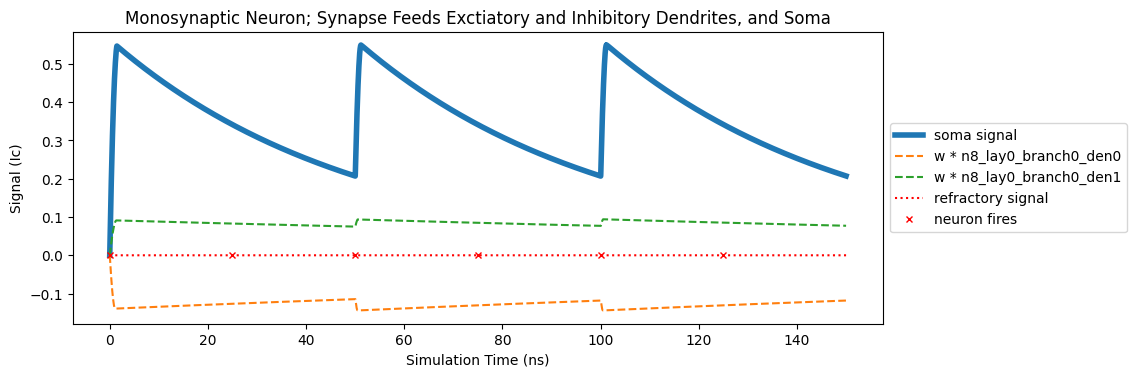

In [18]:
# here we synaptic connecitons at the somatic layer and twice at the first dendritic layer
# all from one synapse
syn_struct = [[[[1]],[[.8,.9]]]]
w = [[[-.4,.2]]]
mono_plus_minus = NeuralZoo(type='custom',synaptic_structure=syn_struct,weights=w,s_th=1)

# manually adding input to each knowen synapse
mono_plus_minus.synapses[0][1][0][0].add_input(input.signals[0])
mono_plus_minus.synapses[0][1][0][1].add_input(input.signals[0])
mono_plus_minus.synapses[0][0][0][0].add_input(input.signals[0])

net = network(sim=True,dt=.01,tf=150,nodes=[mono_plus_minus])
title = "Monosynaptic Neuron; Synapse Feeds Exctiatory and Inhibitory Dendrites, and Soma"
mono_plus_minus.plot_neuron_activity(net,title=title,input=input)

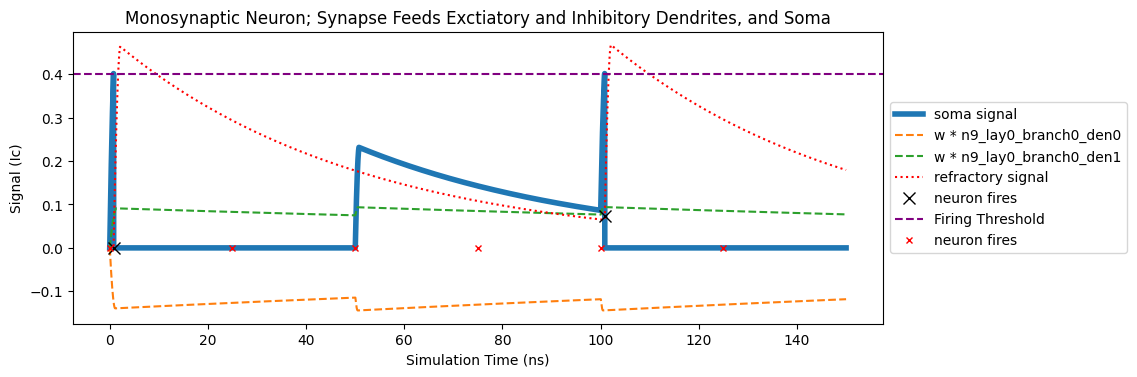

In [19]:
mono_plus_minus = NeuralZoo(type='mono_plus_minus',s_th=0.4)
mono_plus_minus.uniform_input(input) # much easier
net = network(sim=True,dt=.01,tf=150,nodes=[mono_plus_minus])
title = "Monosynaptic Neuron; Synapse Feeds Exctiatory and Inhibitory Dendrites, and Soma"
mono_plus_minus.plot_neuron_activity(net,title=title,input=input)

# Double Refraction

![ title](img/neurons/mono_double_ref.png)

In [20]:
# # Double refractory
# # default_neuron_params['s_th'] = 0.3
# double_ref = NeuralZoo(type='double_ref',**default_neuron_params)
# double_ref.synapses[0][1][0][0].add_input(input.signals[0])
# # print(double_ref.neuron.dend__nr_ni.dendritic_connection_strengths)
# net = network(sim=True,dt=.01,tf=150,nodes=[double_ref])
# title = "double_ref"
# double_ref.neuron.plot_simple = True
# net.plot()
# double_ref.plot_neuron_activity(net,title=title)

# Three Excitatory and One Inhibitory Synapse

![ title](img/neurons/3ex_1in.png)

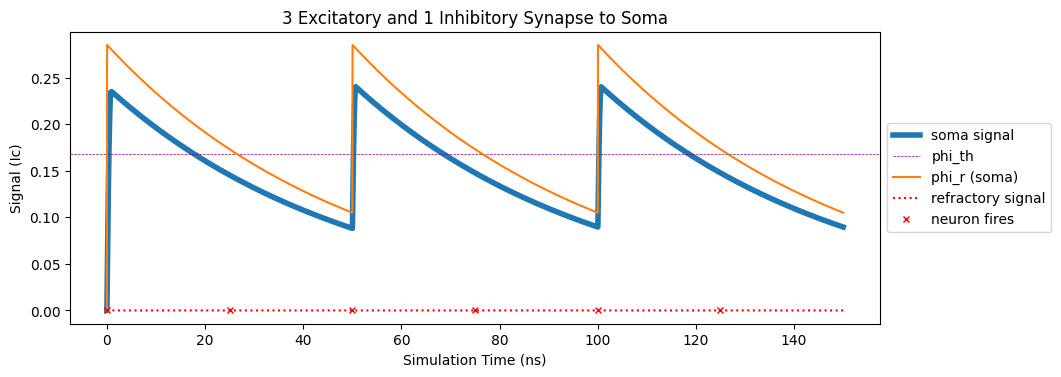

In [21]:
# Notice this line defines *multiple* synapses, all at the somatic position
# connection strength lowered to avoid rollover
syn_struct = [[[[.3]]],[[[.3]]],[[[.3]]],[[[-.3]]]]
point_3ex_1in = NeuralZoo(type='custom',synaptic_structure=syn_struct,s_th=1)

# connect each synapse to same input signal
point_3ex_1in.synapses[0][0][0][0].add_input(input.signals[0])
point_3ex_1in.synapses[1][0][0][0].add_input(input.signals[0])
point_3ex_1in.synapses[2][0][0][0].add_input(input.signals[0])
point_3ex_1in.synapses[3][0][0][0].add_input(input.signals[0])

net = network(sim=True,dt=.01,tf=150,nodes=[point_3ex_1in])
title = "3 Excitatory and 1 Inhibitory Synapse to Soma"
point_3ex_1in.plot_neuron_activity(net,title=title,input=input,phir=True)

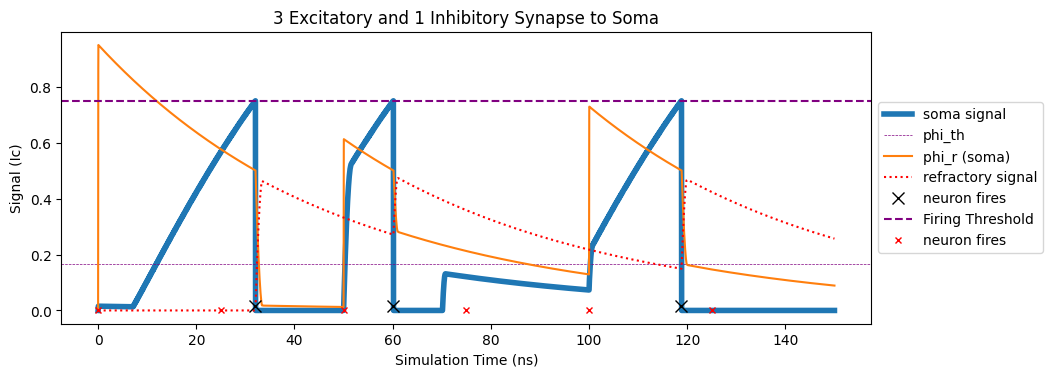

In [22]:
point_3ex_1in = NeuralZoo(type='point_3ex_1in',s_th=0.75)
point_3ex_1in.uniform_input(input)
net = network(sim=True,dt=.01,tf=150,nodes=[point_3ex_1in])
title = "3 Excitatory and 1 Inhibitory Synapse to Soma"
point_3ex_1in.plot_neuron_activity(net,title=title,input=input,phir=True)

# QUESTION  Why no rollover?

# Assymetrical Neuron

![ title](img/neurons/asymm.png)

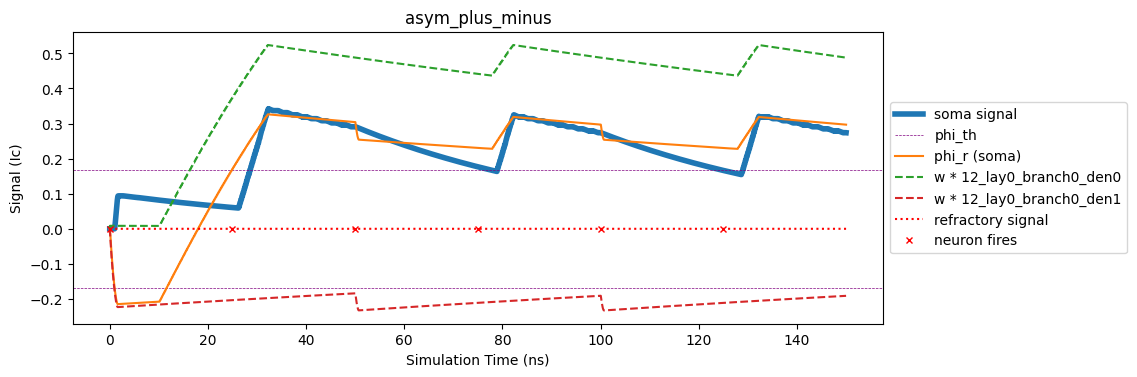

In [23]:
# Five synapses total, each with specified points of connectivity
syn_struct = [
    [
        [[0]],
        [[1,0]]
    ],
    [
        [[0]],
        [[1,0]]
    ],
    [
        [[0]],
        [[1,0]]
    ],
    [
        [[0]],
        [[-1,0]]
    ],
    [
        [[0]],
        [[0,-1]]
    ],
]
w = [[[.8,-.4]]]

asym_plus_minus = NeuralZoo(type='custom',synaptic_structure=syn_struct,weights=w)

# add input to the synapses at each of their specific positions
# now is a good time to note that there is also a zoo_object.synapse_list
# synapse list is a single dimensional list of all synapses
# this is what .uniform_input() uses to add input signal
asym_plus_minus.synapses[0][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[1][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[2][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[3][1][0][0].add_input(input.signals[0])
asym_plus_minus.synapses[4][1][0][1].add_input(input.signals[0])

net = network(sim=True,dt=.01,tf=150,nodes=[asym_plus_minus])
title = "asym_plus_minus"
asym_plus_minus.plot_neuron_activity(net,title=title,input=input,phir=True)

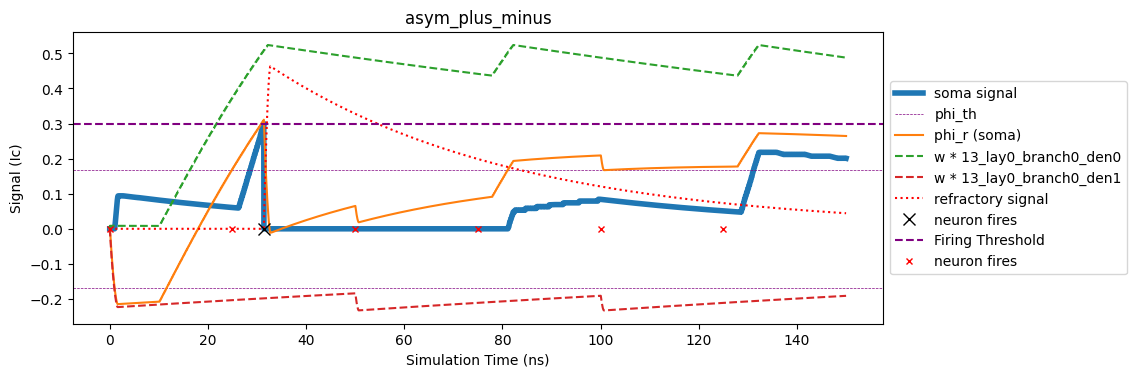

In [24]:
asym_plus_minus = NeuralZoo(type='asym_plus_minus',s_th=0.3)
asym_plus_minus.uniform_input(input)
net = network(sim=True,dt=.01,tf=150,nodes=[asym_plus_minus])
title = "asym_plus_minus"
asym_plus_minus.plot_neuron_activity(net,title=title,input=input,phir=True)

# Here is a good time to observe that so long as phi_r is with its threshold bounds,
# signal remains inert

# Three Excitatory and One Inhibitory Dendrites

![ title](img/neurons/jellyfish.png)

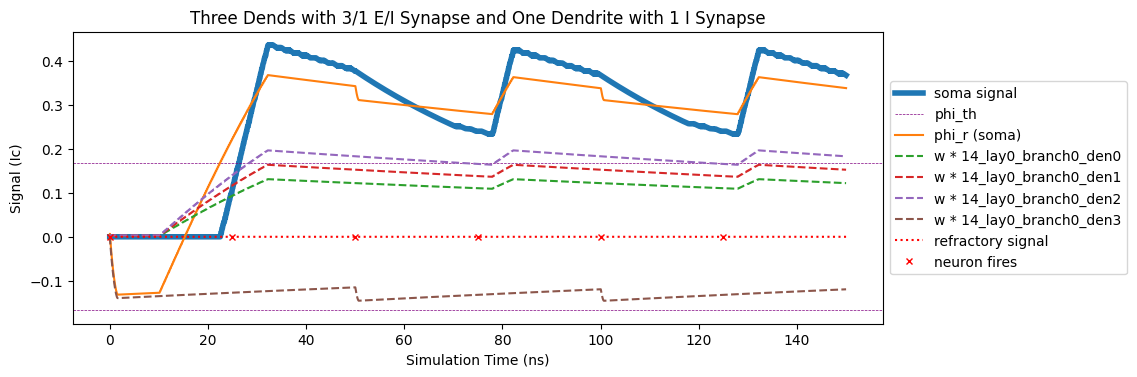

In [25]:
syn_struct = [
            [
                [[0]],
                [[1,0,0,0]]
            ],
            [
                [[0]],
                [[1,0,0,0]]
            ],
            [
                [[0]],
                [[1,0,0,0]]
            ],
            [
                [[0]],
                [[-1,0,0,0]]
            ],
            [
                [[0]],
                [[0,1,0,0]]
            ],
            [
                [[0]],
                [[0,1,0,0]]
            ],
            [
                [[0]],
                [[0,1,0,0]]
            ],
            [
                [[0]],
                [[0,-1,0,0]]
            ],
            [
                [[0]],
                [[0,0,1,0]]
            ],
            [
                [[0]],
                [[0,0,1,0]]
            ],
            [
                [[0]],
                [[0,0,1]]
            ],
            [
                [[0]],
                [[0,0,-1,0]]
            ],
            [
                [[0]],
                [[0,0,0,-1]]
            ],
        ]
w = [[[.2,.25,.3,-.25]]]

denex3_denin1 = NeuralZoo(type='denex3_denin1',synaptic_structure=syn_struct,weights=w, s_th=1)

denex3_denin1.synapses[0][1][0][0].add_input(input.signals[0])
denex3_denin1.synapses[1][1][0][0].add_input(input.signals[0])
denex3_denin1.synapses[2][1][0][0].add_input(input.signals[0])
denex3_denin1.synapses[3][1][0][0].add_input(input.signals[0])

denex3_denin1.synapses[4][1][0][1].add_input(input.signals[0])
denex3_denin1.synapses[5][1][0][1].add_input(input.signals[0])
denex3_denin1.synapses[6][1][0][1].add_input(input.signals[0])
denex3_denin1.synapses[7][1][0][1].add_input(input.signals[0])

denex3_denin1.synapses[8][1][0][2].add_input(input.signals[0])
denex3_denin1.synapses[9][1][0][2].add_input(input.signals[0])
denex3_denin1.synapses[10][1][0][2].add_input(input.signals[0])
denex3_denin1.synapses[11][1][0][2].add_input(input.signals[0])

denex3_denin1.synapses[12][1][0][3].add_input(input.signals[0])

net = network(sim=True,dt=.01,tf=150,nodes=[denex3_denin1])
title = "Three Dends with 3/1 E/I Synapse and One Dendrite with 1 I Synapse"
denex3_denin1.plot_neuron_activity(net,title=title,input=input,phir=True)

# QUESTION: why synaptic delay?

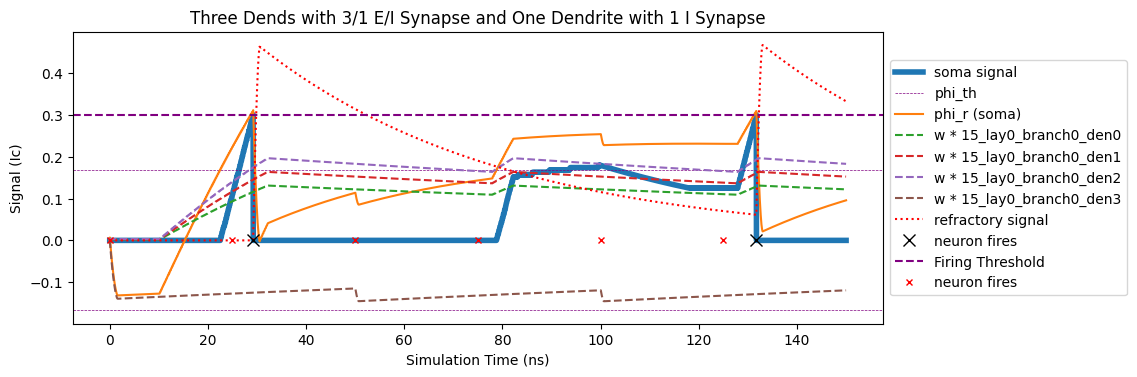

In [26]:
denex3_denin1 = NeuralZoo(type='denex3_denin1',s_th=0.3)
denex3_denin1.uniform_input(input)
net = network(sim=True,dt=.01,tf=150,nodes=[denex3_denin1])
title = "Three Dends with 3/1 E/I Synapse and One Dendrite with 1 I Synapse"
denex3_denin1.plot_neuron_activity(net,title=title,input=input,phir=True)

# Neuron with Proximal and Basal Dendrites

![ title](img/neurons/basal_proximal.png)

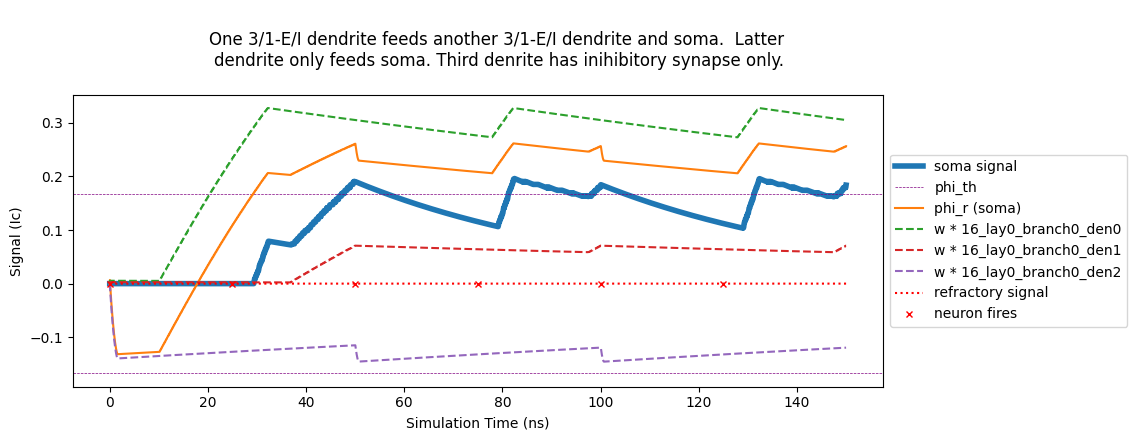

In [27]:
syn_struct = [
            [
                [[0]],
                [[1,0,0]]
            ],
            [
                [[0]],
                [[1,0,0]]
            ],
            [
                [[0]],
                [[1,0,0]]
            ],
            [
                [[0]],
                [[-1,0,0]]
            ],
            [
                [[0]],
                [[0,1,0]]
            ],
            [
                [[0]],
                [[0,1,0]]
            ],
            [
                [[0]],
                [[0,1,0]]
            ],
            [
                [[0]],
                [[0,-1,0]]
            ],
            [
                [[0]],
                [[0,0,-1]]
            ],
        ]
W = [[[.5,.25,-.25]]]

proximal_basal = NeuralZoo(type='custom',synaptic_structure=syn_struct,weights=W,s_th=1)

# adding the lateral dendritic connection
proximal_basal.dendrites[1][0][1].add_input(proximal_basal.dendrites[1][0][0], connection_strength=.5)

proximal_basal.synapses[0][1][0][0].add_input(input.signals[0])
proximal_basal.synapses[1][1][0][0].add_input(input.signals[0])
proximal_basal.synapses[2][1][0][0].add_input(input.signals[0])
proximal_basal.synapses[3][1][0][0].add_input(input.signals[0])

proximal_basal.synapses[4][1][0][1].add_input(input.signals[0])
proximal_basal.synapses[5][1][0][1].add_input(input.signals[0])
proximal_basal.synapses[6][1][0][1].add_input(input.signals[0])
proximal_basal.synapses[7][1][0][1].add_input(input.signals[0])

proximal_basal.synapses[8][1][0][2].add_input(input.signals[0])

net = network(sim=True,dt=.01,tf=150,nodes=[proximal_basal])
title = '''
        One 3/1-E/I dendrite feeds another 3/1-E/I dendrite and soma.  Latter 
        dendrite only feeds soma. Third denrite has inihibitory synapse only.
        '''
proximal_basal.plot_neuron_activity(net,title=title,input=input,phir=True,weighting=True)


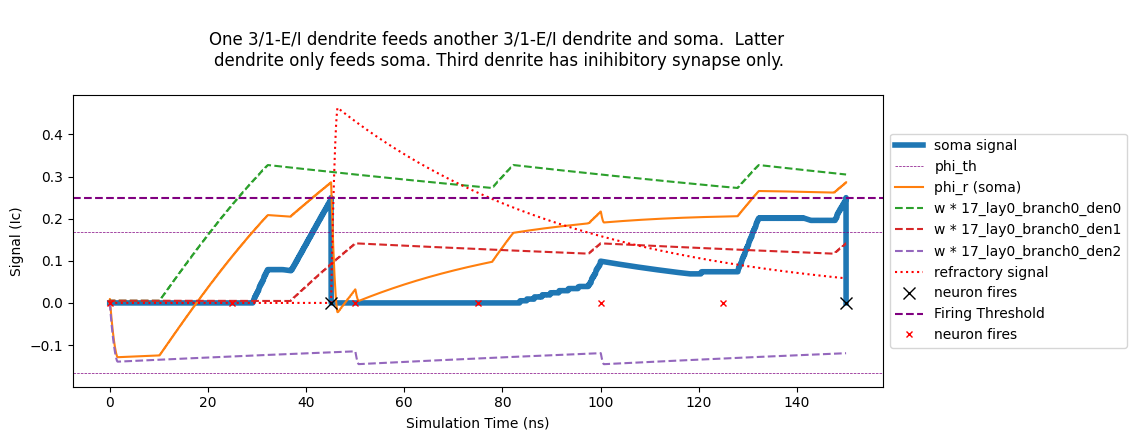

In [28]:
proximal_basal = NeuralZoo(type='proximal_basal',s_th=0.25)
proximal_basal.uniform_input(input)
net = network(sim=True,dt=.01,tf=150,nodes=[proximal_basal])
title = '''
        One 3/1-E/I dendrite feeds another 3/1-E/I dendrite and soma.  Latter 
        dendrite only feeds soma. Third denrite has inihibitory synapse only.
        '''
proximal_basal.plot_neuron_activity(net,title=title,input=input,phir=True)